## Data Description:



The data is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product (bank term deposit) would
be ('yes') or not ('no') subscribed. 


Domain:

Banking


Context:
Leveraging customer information is paramount for most businesses. In the case of a bank,
attributes of customers like the ones mentioned below can be crucial in strategizing a
marketing campaign when launching a new product.

Attribute Information:
1. age (numeric)

2. job : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')

3. marital : marital status (categorical: 'divorced','married','single','unknown';
note: 'divorced' means divorced or widowed)

4. education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','univers
ity.degree','unknown')

5. default: has credit in default? (categorical: 'no','yes','unknown')

6. balance: average yearly balance, in euros (numeric)

7. housing: has housing loan? (categorical: 'no','yes','unknown')

8. loan: has personal loan? (categorical: 'no','yes','unknown')

9. contact: contact communication type (categorical: 'cellular','telephone')

10.day: last contact day of the month (numeric 1 -31)

11.month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12.duration: last contact duration, in seconds (numeric). Important note: this
attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet,
the duration is not known before a call is performed. Also, after the end of the
call y is obviously known. Thus, this input should only be included for benchmark
purposes and should be discarded if the intention is to have a realistic predictive
model.

13.campaign: number of contacts performed during this campaign and for this
client (numeric, includes last contact)

14.pdays: number of days that passed by after the client was last contacted from a
previous campaign (numeric; 999 means client was not previously contacted)

15.previous: number of contacts performed before this campaign and for this client
(numeric)

16.poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

17.target: has the client subscribed a term deposit? (binary: "yes","no")

# Learning Outcomes:

 Exploratory Data Analysis

 Preparing the data to train a model

 Training and making predictions using an Ensemble Model

 Tuning an Ensemble model

# Objective:

The classification goal is to predict if the client will subscribe (yes/no) a term deposit
(variable y).

# Steps and tasks:

# 1. Import the necessary libraries

In [151]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from sklearn import tree
from os import system

# 2. Read the data as a data frame

In [152]:
creditData = pd.read_csv('bank-full.csv')
creditData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# 3. Perform basic EDA which should include the following and print out your insights at every step. 

# a. Shape of the data

In [153]:
creditData.shape

(45211, 17)

The dataframe is a 45211 x 17 matrix with 17 attributes and 45211 rows

# b. Data type of each attribute

In [154]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


There is 45211 entries in each columns and there is no missing values.

# c. Checking the presence of missing values

In [155]:
pd.isnull(creditData).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no missing values within the dataset.Although there are no missing values.There is the label 'unknown' as seen in the head of the dataset within the dataset that corresponds to a missing value.We may have to deal with the same at a later stage.

# d. 5 Point summary of numerical attributes

In [156]:
creditData.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


From a preliminary analysis,we have attributes job,marital,education,default,housing,loan,contact,month,poutcome and target which are objects which are probably categotical variables and age,balance,day,pdays and previous which have integers probably denoting that they are continous variables.

We can also see the five point summary of all the numerical attributes in the above table in the last five rows below.

In [157]:
creditData.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


A significant amount of correlation can be seen in between the columns pdays and previous.We have to have further investigation into the attributes for confirmation of suitable correlation

In [158]:
prevcontact = creditData[creditData['pdays']!=-1]

Removing the default value set when the client is not contacted previously

In [159]:
prevcontact.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.115480,0.018399,0.060519,0.003842,-0.107863,0.002280
balance,0.115480,1.000000,0.051732,0.040998,-0.008150,-0.108122,0.001570
day,0.018399,0.051732,1.000000,-0.012687,-0.029295,-0.090095,-0.016801
duration,0.060519,0.040998,-0.012687,1.000000,-0.088394,-0.024407,-0.002150
campaign,0.003842,-0.008150,-0.029295,-0.088394,1.000000,0.050534,0.135523
pdays,-0.107863,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885
previous,0.002280,0.001570,-0.016801,-0.002150,0.135523,-0.021885,1.000000


We can notice that the correlation suddenly vanish as we know for all the values for pdays = -1 where the client was not previously contacted the previous would be 0 as the no. of days the client has been contacted is 0.The correlation has arose due to this similarity in values

# e. Checking the presence of outliers

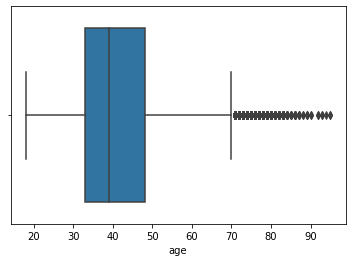

In [160]:
sns.boxplot(x= 'age',data = creditData)

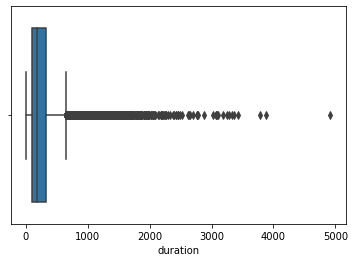

In [161]:
sns.boxplot(x='duration',data =creditData)

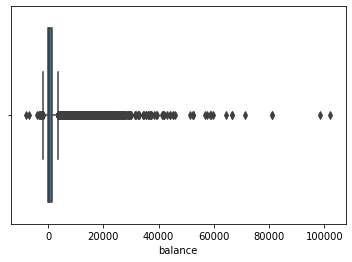

In [162]:
sns.boxplot(x='balance',data =creditData)

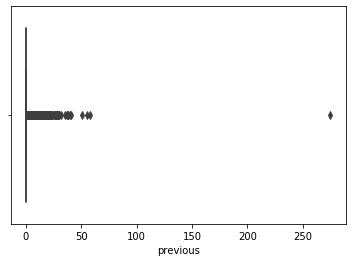

In [163]:
sns.boxplot(x='previous',data =creditData)

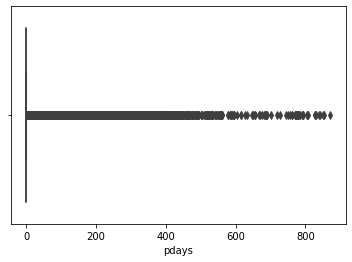

In [164]:
sns.boxplot(x='pdays',data =creditData)

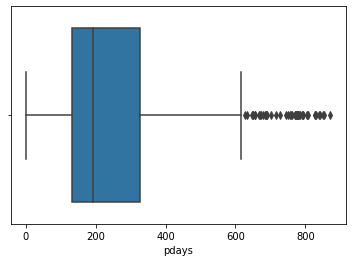

In [165]:
sns.boxplot(x='pdays',data = prevcontact)

There are significant amount of outliers in each of the numerical attributes.

# EDA for the other categorical attributes

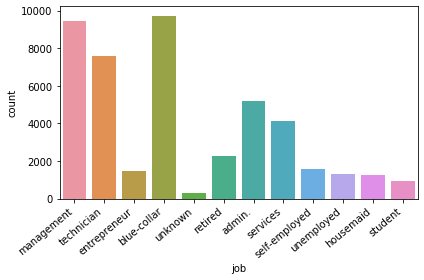

In [166]:
ax = sns.countplot(x='job',data =creditData)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

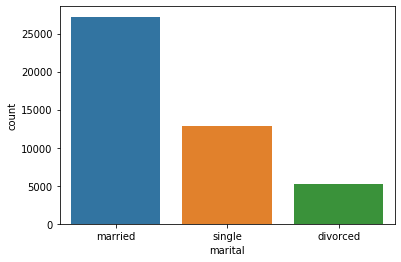

In [167]:
sns.countplot(x='marital',data =creditData)

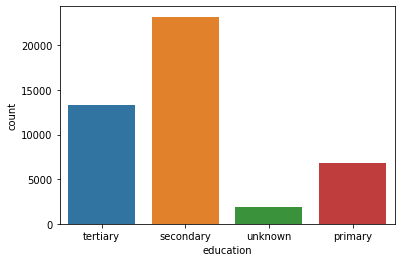

In [168]:
sns.countplot(x='education',data =creditData)

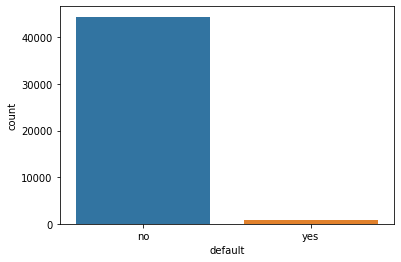

In [169]:
sns.countplot(x='default',data =creditData)

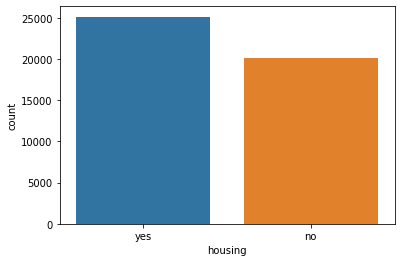

In [170]:
sns.countplot(x='housing',data =creditData)

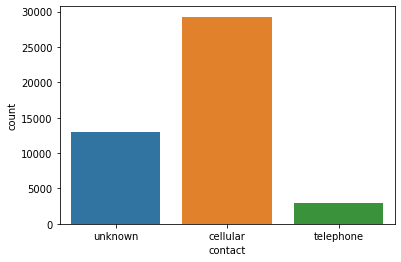

In [171]:
sns.countplot(x='contact',data =creditData)

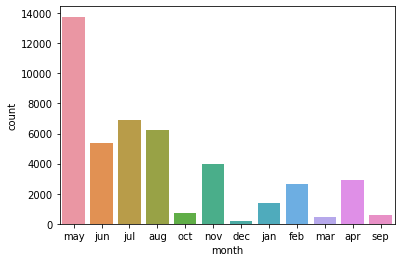

In [172]:
sns.countplot(x='month',data =creditData)

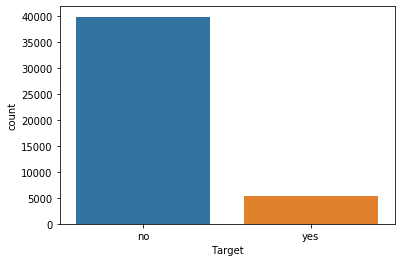

In [173]:
sns.countplot(x='Target',data =creditData)

The Dataset is  unbalanced as the number of entries in the success category is significantly lesser than the number of entries in the other category

The significance of the all the dependent variables to the target variable

In [174]:
pd.crosstab(creditData['job'],creditData['Target'],normalize = 'index')

Target,no,yes
job,,
admin.,0.877973,0.122027
blue-collar,0.927250,0.072750
entrepreneur,0.917283,0.082717
housemaid,0.912097,0.087903
management,0.862444,0.137556
retired,0.772085,0.227915
self-employed,0.881571,0.118429
services,0.911170,0.088830
student,0.713220,0.286780


In [175]:
pd.crosstab(creditData['job'],creditData['Target'],margins=True)

Target,no,yes,All
job,,,
admin.,4540,631,5171
blue-collar,9024,708,9732
entrepreneur,1364,123,1487
housemaid,1131,109,1240
management,8157,1301,9458
retired,1748,516,2264
self-employed,1392,187,1579
services,3785,369,4154
student,669,269,938


The students and unemployed are the most likely clients to subscribe for the  the term deposit.
The type of clients based on job in the increasing order of probablity of subscription for term deposit are (exluding unknown)

1.blue-collar

2.entrepreneur

3.housemaid

4.services

5.technician

6.self-employed	

7.admin.

8.management

9.unemployed

10.retired

11.student

In [176]:
pd.crosstab(creditData['education'],creditData['Target'],normalize = 'index')

Target,no,yes
education,,
primary,0.913735,0.086265
secondary,0.894406,0.105594
tertiary,0.849936,0.150064
unknown,0.864297,0.135703


In [177]:
pd.crosstab(creditData['education'],creditData['Target'],margins=True)

Target,no,yes,All
education,,,
primary,6260,591,6851
secondary,20752,2450,23202
tertiary,11305,1996,13301
unknown,1605,252,1857
All,39922,5289,45211


The probability for client with tertiary education to subcribe to the term deposit is greater than that of one with secondary education followed by the one with primary education

In [178]:
pd.crosstab(creditData['housing'],creditData['Target'],normalize = 'index')

Target,no,yes
housing,,
no,0.832976,0.167024
yes,0.923000,0.077000


In [179]:
pd.crosstab(creditData['housing'],creditData['Target'],margins=True)

Target,no,yes,All
housing,,,
no,16727,3354,20081
yes,23195,1935,25130
All,39922,5289,45211


The clients who do not have a housing loan are more likely to subscribe for the term deposit

In [180]:
pd.crosstab(creditData['marital'],creditData['Target'],normalize = 'index')

Target,no,yes
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


In [181]:
pd.crosstab(creditData['marital'],creditData['Target'],margins=True)

Target,no,yes,All
marital,,,
divorced,4585,622,5207
married,24459,2755,27214
single,10878,1912,12790
All,39922,5289,45211


The clients who are single are most likely to subscribe for the term deposit.
Thereafter,people who are divorced are more likely to subscribe to the term deposit.

In [182]:
pd.crosstab(creditData['default'],creditData['Target'],normalize = 'index')

Target,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


In [183]:
pd.crosstab(creditData['default'],creditData['Target'],margins = True)

Target,no,yes,All
default,,,
no,39159,5237,44396
yes,763,52,815
All,39922,5289,45211


The defaulter to credit are less likely to subscribe for the term deposit

In [184]:
pd.crosstab(creditData['loan'],creditData['Target'],normalize = 'index')

Target,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [185]:
pd.crosstab(creditData['loan'],creditData['Target'],margins = True)

Target,no,yes,All
loan,,,
no,33162,4805,37967
yes,6760,484,7244
All,39922,5289,45211


The clients without personal loans are more likely to subscribe for the term deposit

In [186]:
pd.crosstab(creditData['contact'],creditData['Target'],normalize ='index')

Target,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


In [187]:
pd.crosstab(creditData['contact'],creditData['Target'],margins = True)

Target,no,yes,All
contact,,,
cellular,24916,4369,29285
telephone,2516,390,2906
unknown,12490,530,13020
All,39922,5289,45211


This feature is probably irrelavant although from the data it can be seen that the people contacted on their cellular phones are more likely to subscribe to the term deposit but this difference is not significant.The problem with this dependent variable is that this dependent variable has a large number of unknown values.Hence,it is better to drop this column from the data set.

In [188]:
creditData.groupby('Target').describe()['balance']

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
no,39922.0,1303.714969,2974.195473,-8019.0,58.0,417.0,1345.0,102127.0
yes,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0


In [189]:
creditData.groupby('Target').describe()['duration']

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
no,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
yes,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


In [190]:
creditData.groupby('Target').describe()['campaign']

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
no,39922.0,2.846350,3.212767,1.0,1.0,2.0,3.0,63.0
yes,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0


In [191]:
creditData.groupby('Target').describe()['previous']

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
no,39922.0,0.502154,2.256771,0.0,0.0,0.0,0.0,275.0
yes,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


In [192]:
creditData.groupby('Target').describe()['age']

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
no,39922.0,40.838986,10.172662,18.0,33.0,39.0,48.0,95.0
yes,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0


The numerical variables with 5 points analysis grouped by the target variable infer that there is the dependent variables duration and balance have some amount of correlation which have lead to a descisive model.However,we will have to drop the duration column as per the problem text for a realisitic predictive model and further investigation into the dependent variable balance would be require to say more about its influence.

In [193]:
pd.crosstab(creditData['loan'],creditData['Target'],normalize = 'index')

Target,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [194]:
pd.crosstab(creditData['loan'],creditData['Target'],margins=True)

Target,no,yes,All
loan,,,
no,33162,4805,37967
yes,6760,484,7244
All,39922,5289,45211


The client who have a personal loan are more likely to say no to this campaign.

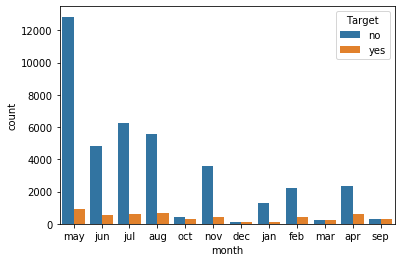

In [195]:
sns.countplot(x='month', hue= 'Target',data = creditData)

In [196]:
pd.crosstab(creditData['month'],creditData['Target'],normalize = 'index')

Target,no,yes
month,,
apr,0.803206,0.196794
aug,0.889867,0.110133
dec,0.532710,0.467290
feb,0.833522,0.166478
jan,0.898788,0.101212
jul,0.909065,0.090935
jun,0.897772,0.102228
mar,0.480084,0.519916
may,0.932805,0.067195


In [197]:
pd.crosstab(creditData['month'],creditData['Target'],margins = True)

Target,no,yes,All
month,,,
apr,2355,577,2932
aug,5559,688,6247
dec,114,100,214
feb,2208,441,2649
jan,1261,142,1403
jul,6268,627,6895
jun,4795,546,5341
mar,229,248,477
may,12841,925,13766


The probability of accepting the term deposit varies with the month of contact.The list of months with the decreasing order of probablity for subscribing to the term deposit is given below:

1.March

2.December

3.September

4.October

5.April

6.February

7.August

8.January

9.November

10.January

11.July

12.May

In [198]:
pd.crosstab(creditData['poutcome'],creditData['Target'],normalize = 'index')

Target,no,yes
poutcome,,
failure,0.873903,0.126097
other,0.833152,0.166848
success,0.352747,0.647253
unknown,0.908385,0.091615


In [199]:
pd.crosstab(creditData['poutcome'],creditData['Target'],margins = True)

Target,no,yes,All
poutcome,,,
failure,4283,618,4901
other,1533,307,1840
success,533,978,1511
unknown,33573,3386,36959
All,39922,5289,45211


The client who had accepted the term deposit for the previous capaign are most likely to accept the same in the current campaign.Here there is a presence of a large number of unknown values,Although we cannot drop this column since it has a very high correlation with the target variable.

In [200]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)

pd.pivot_table(creditData,'previous',index = ['poutcome'],columns = ['Target'],aggfunc = [min,my25,np.median,my75,max])

min     my25     median     my75      max    
Target    no yes   no yes     no yes   no yes   no yes
poutcome                                              
failure    1   1    1   1      2   2    3   4   51  55
other      1   1    1   1      2   2    4   5  275  58
success    1   1    1   1      2   2    4   4   28  21
unknown    0   0    0   0      0   0    0   0    7   2

No clear discrimination can be inferred as people upto 75 percentile,the values are almost the same and very close by.

# My understanding

In this problem,we are searching for potential clients that would subscribe to the term deposit from the data given about them.

Here,Success is the case when a potential candidate is rightly identified and this is deemed to be positive.

Hence,False Negitives(Type 2 Error) are the potential clients the model fails to identify and False Positives are clients that the model incorrectly identifies (Type 1 Error).

Here,the False Negitives will lead to losing a potential client while False Positives will only lead to a unwanted call for a client from the bank.Hence,we will have to concentrate on eliminating the False Negitives.Here,we will have concentrate on Recall rather than precision in determining the right model for our problem. 

# 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.

We will have to drop the duration column as in order to built a predictive realistic model as mentioned the question.

This will eliminate the influence of this variable on our target variable.

In [201]:
creditData.drop('duration',axis =1,inplace = True)

The columns poutcome has a lot of unknown values.But the little data within it is highly influencial in helping us arrive at a good model.Hence ,we should not drop this column as the influence of this variable is very high and hence would help in building a good model.

In [202]:
creditData['poutcome'] = creditData['poutcome'].replace(to_replace = 'unknown' ,value ='N.A.')

In [203]:
creditData['contact'] = creditData['contact'].replace(to_replace = 'unknown' ,value ='N.A.')
#creditData.drop('contact',axis =1,inplace = True)

We need to the datatype of all the categorical variables from object to categorical.

In [204]:
for feature in creditData.columns:
    if creditData[feature].dtype == 'object':
        creditData[feature] = pd.Categorical(creditData[feature])
creditData.head(10)

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,5,may,1,-1,0,N.A.,no
1,44,technician,single,secondary,no,29,yes,no,5,may,1,-1,0,N.A.,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1,-1,0,N.A.,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,1,-1,0,N.A.,no
4,33,unknown,single,unknown,no,1,no,no,5,may,1,-1,0,N.A.,no
5,35,management,married,tertiary,no,231,yes,no,5,may,1,-1,0,N.A.,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,1,-1,0,N.A.,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,5,may,1,-1,0,N.A.,no
8,58,retired,married,primary,no,121,yes,no,5,may,1,-1,0,N.A.,no
9,43,technician,single,secondary,no,593,yes,no,5,may,1,-1,0,N.A.,no


In [205]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
day          45211 non-null int64
month        45211 non-null category
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(9), int64(6)
memory usage: 2.5 MB


In [206]:
creditData.replace('unknown',np.nan,inplace = True)

Replacing all unknown values of insignificant columns with NaN in order to remove it using dropna

In [207]:
creditData.dropna(inplace =True,how ='any')
creditData.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,5,may,1,-1,0,N.A.,no
1,44,technician,single,secondary,no,29,yes,no,5,may,1,-1,0,N.A.,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1,-1,0,N.A.,no
5,35,management,married,tertiary,no,231,yes,no,5,may,1,-1,0,N.A.,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,1,-1,0,N.A.,no


In [208]:
creditData.shape

(43193, 15)

In [209]:
replaceStruct = {
                "job":     {"blue-collar": 1, "entrepreneur": 2 ,"housemaid": 3 ,"services":4,"technician":5, "unknown": 6,"self-employed":7,"admin.":8,"management":9,"unemployed":10,"retired":11,"student":12},
                "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": -1},
                 "marital": {"married": 1, "divorced":2 , "single": 3},
                "housing":     {"no": 0, "yes": 1 },
                 "default":     {"no": 0, "yes": 1 },
                "loan":     {"no": 1, "yes": 0 },
                 "month":     {"may": 1, "jul": 2 ,"jan": 3 ,"nov": 4 ,"jun": 5,"aug":6,"feb":7,"apr":8,"oct":9,"sep":10,"dec":11,"mar":12},
                "Target":   {"no": 0, "yes": 1 },
                "poutcome":   {"success": 2, "other": 1,"failure": 0, "N.A." : -1 },
                "contact": {"cellular":1,"telephone":0,"N.A.":-1}
                    }


In [210]:
creditData = creditData.replace(replaceStruct)

creditData.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,Target
0,58,9,1,3,0,2143,1,1,5,1,1,-1,0,-1,0
1,44,5,3,2,0,29,1,1,5,1,1,-1,0,-1,0
2,33,2,1,2,0,2,1,0,5,1,1,-1,0,-1,0
5,35,9,1,3,0,231,1,1,5,1,1,-1,0,-1,0
6,28,9,3,3,0,447,1,0,5,1,1,-1,0,-1,0


The standard scalar is applied for the numerical variables and not the categorical variables as random forest generates errors when the same is applied for categorical variables.

Hence,we will have to Standardise the numericals variables now to do Descision Tree and then use standardisation and apply KNN thereafter in order to get good accuracies for KNN

In [211]:
from sklearn.preprocessing import StandardScaler
creditData[['age', 'balance']] = StandardScaler().fit_transform(creditData[['age', 'balance']])
creditData.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,poutcome,Target
0,1.639561,9,1,3,0,0.259354,1,1,5,1,1,-1,0,-1,0
1,0.307816,5,3,2,0,-0.435568,1,1,5,1,1,-1,0,-1,0
2,-0.738556,2,1,2,0,-0.444443,1,0,5,1,1,-1,0,-1,0
5,-0.548306,9,1,3,0,-0.369166,1,1,5,1,1,-1,0,-1,0
6,-1.214179,9,3,3,0,-0.298161,1,0,5,1,1,-1,0,-1,0


In [212]:
x = creditData.drop("Target",axis =1)
y = creditData.pop("Target")

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3,random_state = 1)

# 5.Train a few standard classification algorithms, note and comment on their performances across different classification metrics.

# 6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees.

In [214]:
for i in range(1,10,1):
    dTree = DecisionTreeClassifier(criterion = 'entropy' ,max_depth = i, random_state = 1)
    dTree.fit(x_train,y_train)
    y_predict = dTree.predict(x_test)
    print('\n')
    print('For Max. depth of Tree = ',i)
    print('Model Accuracy on Test Data :',dTree.score(x_test,y_test))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))



For Max. depth of Tree =  1
Model Accuracy on Test Data : 0.8953542213304523
Model Recall on Test Data : 0.18974700399467376


For Max. depth of Tree =  2
Model Accuracy on Test Data : 0.8934249112517364
Model Recall on Test Data : 0.13382157123834887


For Max. depth of Tree =  3
Model Accuracy on Test Data : 0.8949683593147091
Model Recall on Test Data : 0.2103861517976032


For Max. depth of Tree =  4
Model Accuracy on Test Data : 0.8945824972989659
Model Recall on Test Data : 0.1970705725699068


For Max. depth of Tree =  5
Model Accuracy on Test Data : 0.8950455317178577
Model Recall on Test Data : 0.16378162450066577


For Max. depth of Tree =  6
Model Accuracy on Test Data : 0.89435098008952
Model Recall on Test Data : 0.21171770972037285


For Max. depth of Tree =  7
Model Accuracy on Test Data : 0.8940422904769254
Model Recall on Test Data : 0.19241011984021306


For Max. depth of Tree =  8
Model Accuracy on Test Data : 0.8929618768328446
Model Recall on Test Data : 0.221038

As we said earlier the along with accuracy,the Recall would also be a significant factor in deciding the better model in order to accomplish our task.Hence,we will have to select Max. depth of Tree = 6 for obtainig optimum results.

In [215]:
dTree = DecisionTreeClassifier(criterion = 'entropy' ,max_depth = 6, random_state = 1)
dTree.fit(x_train,y_train)
y_predict = dTree.predict(x_test)
print('Model Accuracy on Test Data :',dTree.score(x_test,y_test))
print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

Model Accuracy on Test Data : 0.89435098008952
Model Recall on Test Data : 0.21171770972037285


In [216]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])
df_cm.T

,No,Yes
Predict No,11271,1184
Predict Yes,185,318


It can be seen that the Descision Tree has correctly classified 326 clients correctly and 193 client wrong.We will see how the accuracies of other models and ensemble models perform for comparison between the models

In [217]:
from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , y_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , y_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , y_predict))

Model Accuracy on Test Data : 0.89435098008952
Model Recall on Test Data : 0.21171770972037285
Model Precision on Test Data: 0.6322067594433399
Model f1 score on Test Data: 0.31720698254364094


In [218]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns))

                Imp
age        0.108247
job        0.001662
marital    0.017156
education  0.003610
default    0.000000
balance    0.005151
housing    0.057779
loan       0.000000
day        0.012366
month      0.297211
campaign   0.007783
pdays      0.050824
previous   0.004218
poutcome   0.433993


# Bagging Classifier

In [219]:
from sklearn.ensemble import BaggingClassifier
for i in range(10,80,5):
    bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=i,random_state=1)

    bgcl = bgcl.fit(x_train, y_train)

    y_predict = bgcl.predict(x_test)
    print('\n')
    print('Number of estimators =',i)
    print('Model Accuracy on Test Data :',bgcl.score(x_test,y_test))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))




Number of estimators = 10
Model Accuracy on Test Data : 0.8961259453619386
Model Recall on Test Data : 0.1744340878828229


Number of estimators = 15
Model Accuracy on Test Data : 0.8962802901682358
Model Recall on Test Data : 0.1810918774966711


Number of estimators = 20
Model Accuracy on Test Data : 0.8968204969902763
Model Recall on Test Data : 0.18575233022636484


Number of estimators = 25
Model Accuracy on Test Data : 0.8970520141997221
Model Recall on Test Data : 0.18841544607190414


Number of estimators = 30
Model Accuracy on Test Data : 0.8969748417965735
Model Recall on Test Data : 0.19241011984021306


Number of estimators = 35
Model Accuracy on Test Data : 0.8969748417965735
Model Recall on Test Data : 0.18908122503328895


Number of estimators = 40
Model Accuracy on Test Data : 0.8970520141997221
Model Recall on Test Data : 0.19174434087882822


Number of estimators = 45
Model Accuracy on Test Data : 0.8968204969902763
Model Recall on Test Data : 0.18974700399467376




The Bagging Classifier with Descision Tree as the Classifier seems to be performing the best when the number of estimators is between 25 and 35.Hence,we will further investigate into the same in order to obtain optimum accuracies

In [220]:
from sklearn.ensemble import BaggingClassifier
for i in range(25,35,1):
    bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=i,random_state=1)

    bgcl = bgcl.fit(x_train, y_train)

    y_predict = bgcl.predict(x_test)
    print('\n')
    print('Number of estimators =',i)
    print('Model Accuracy on Test Data :',bgcl.score(x_test,y_test))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))



Number of estimators = 25
Model Accuracy on Test Data : 0.8970520141997221
Model Recall on Test Data : 0.18841544607190414


Number of estimators = 26
Model Accuracy on Test Data : 0.8969748417965735
Model Recall on Test Data : 0.1877496671105193


Number of estimators = 27
Model Accuracy on Test Data : 0.8967433245871277
Model Recall on Test Data : 0.1877496671105193


Number of estimators = 28
Model Accuracy on Test Data : 0.8968976693934249
Model Recall on Test Data : 0.18974700399467376


Number of estimators = 29
Model Accuracy on Test Data : 0.8968976693934249
Model Recall on Test Data : 0.1904127829560586


Number of estimators = 30
Model Accuracy on Test Data : 0.8969748417965735
Model Recall on Test Data : 0.19241011984021306


Number of estimators = 31
Model Accuracy on Test Data : 0.8967433245871277
Model Recall on Test Data : 0.18974700399467376


Number of estimators = 32
Model Accuracy on Test Data : 0.8964346349745331
Model Recall on Test Data : 0.18908122503328895


N

The optimum result in accuracy and recall is obtained when the number of estimators = 30.

In [221]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=30,random_state=1)
    

bgcl = bgcl.fit(x_train, y_train)

y_predict = bgcl.predict(x_test)

print('Model Accuracy on Test Data :',bgcl.score(x_test,y_test))
print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

Model Accuracy on Test Data : 0.8969748417965735
Model Recall on Test Data : 0.19241011984021306


In [222]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])

df_cm.T

,No,Yes
Predict No,11334,1213
Predict Yes,122,289


It can  be seen that out of the classified client,301 clients are correctly classified and 117 clients are wrongly clssified.Thus using a bagging classifier along with a Descision Tree a the base classifier.We have seen that it performs worse than the base classfier.It may be so that in some cases the base classifier will perform better compared to the bagging classifier.It probably depends on the dataset and kind of classifier.Further investigation into the same can lead to better outcomes.

In [223]:
from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , y_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , y_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , y_predict))

Model Accuracy on Test Data : 0.8969748417965735
Model Recall on Test Data : 0.19241011984021306
Model Precision on Test Data: 0.7031630170316302
Model f1 score on Test Data: 0.30214323052796654


# Random Forest Classifier

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

for i in range(10,55,5):
    rfcl = RandomForestClassifier(n_estimators = i,criterion='entropy', random_state=1,max_features='sqrt')
    rfcl = rfcl.fit(x_train, y_train)
    print("\n")
    print("For Number of estimators = ",i)
    y_predict = rfcl.predict(x_test)
    print('Model Accuracy on Test Data :',rfcl.score(x_test, y_test))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))



For Number of estimators =  10
Model Accuracy on Test Data : 0.8900293255131965
Model Recall on Test Data : 0.2003994673768309


For Number of estimators =  15
Model Accuracy on Test Data : 0.8897206359006019
Model Recall on Test Data : 0.22902796271637815


For Number of estimators =  20
Model Accuracy on Test Data : 0.8918814631887637
Model Recall on Test Data : 0.2103861517976032


For Number of estimators =  25
Model Accuracy on Test Data : 0.8925760148171014
Model Recall on Test Data : 0.2270306258322237


For Number of estimators =  30
Model Accuracy on Test Data : 0.8940422904769254
Model Recall on Test Data : 0.21904127829560585


For Number of estimators =  35
Model Accuracy on Test Data : 0.8940422904769254
Model Recall on Test Data : 0.23501997336884153


For Number of estimators =  40
Model Accuracy on Test Data : 0.894119462880074
Model Recall on Test Data : 0.2237017310252996


For Number of estimators =  45
Model Accuracy on Test Data : 0.8931162216391418
Model Recall 

In [225]:
for i in range(10,55,5):
    rfcl = RandomForestClassifier(n_estimators = i,criterion='gini', random_state=1,max_features='sqrt')
    rfcl = rfcl.fit(x_train, y_train)
    print("\n")
    print("For Number of estimators = ",i)
    y_predict = rfcl.predict(x_test)
    print('Model Accuracy on Test Data :',rfcl.score(x_test, y_test))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))



For Number of estimators =  10
Model Accuracy on Test Data : 0.8908782219478315
Model Recall on Test Data : 0.19241011984021306


For Number of estimators =  15
Model Accuracy on Test Data : 0.8922673252045069
Model Recall on Test Data : 0.237017310252996


For Number of estimators =  20
Model Accuracy on Test Data : 0.8941966352832227
Model Recall on Test Data : 0.2210386151797603


For Number of estimators =  25
Model Accuracy on Test Data : 0.8928075320265473
Model Recall on Test Data : 0.24101198402130491


For Number of estimators =  30
Model Accuracy on Test Data : 0.8931933940422905
Model Recall on Test Data : 0.2210386151797603


For Number of estimators =  35
Model Accuracy on Test Data : 0.8944281524926686
Model Recall on Test Data : 0.23768308921438083


For Number of estimators =  40
Model Accuracy on Test Data : 0.8938879456706282
Model Recall on Test Data : 0.22769640479360853


For Number of estimators =  45
Model Accuracy on Test Data : 0.894119462880074
Model Recall 

It can be seen that higher accuracies are obtained with the entropy criterion rather than the gini criterion

It can be seen that keeping max_features = 'srqt',as this is a classification problem it can be observed that the peak accuracy in train data occurs around 10 to 25 with entropy criterion.We will have to analyse this range more for obtaining better accuracies

In [226]:
for i in range(10,26):
    rfcl = RandomForestClassifier(n_estimators = i,criterion='entropy', random_state=1,max_features='sqrt')
    rfcl = rfcl.fit(x_train, y_train)
    print("\n")
    print("For Number of estimators = ",i)
    y_predict = rfcl.predict(x_test)
    print('Model Accuracy on Test Data :',rfcl.score(x_test, y_test))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))



For Number of estimators =  10
Model Accuracy on Test Data : 0.8900293255131965
Model Recall on Test Data : 0.2003994673768309


For Number of estimators =  11
Model Accuracy on Test Data : 0.8881771878376292
Model Recall on Test Data : 0.23568575233022637


For Number of estimators =  12
Model Accuracy on Test Data : 0.8906467047383856
Model Recall on Test Data : 0.20306258322237017


For Number of estimators =  13
Model Accuracy on Test Data : 0.888871739465967
Model Recall on Test Data : 0.23635153129161118


For Number of estimators =  14
Model Accuracy on Test Data : 0.8906467047383856
Model Recall on Test Data : 0.2010652463382157


For Number of estimators =  15
Model Accuracy on Test Data : 0.8897206359006019
Model Recall on Test Data : 0.22902796271637815


For Number of estimators =  16
Model Accuracy on Test Data : 0.8919586355919124
Model Recall on Test Data : 0.20239680426098536


For Number of estimators =  17
Model Accuracy on Test Data : 0.8911097391572773
Model Recal

In [227]:
rfcl = RandomForestClassifier(n_estimators = 21,criterion='entropy', random_state=1,max_features='sqrt')
rfcl = rfcl.fit(x_train, y_train)
print('Model Accuracy on Train Data :',rfcl.score(x_train, y_train))
y_predict = rfcl.predict(x_test)
print('Model Accuracy on Test Data :',rfcl.score(x_test, y_test))


Model Accuracy on Train Data : 0.9964279808169341
Model Accuracy on Test Data : 0.8914956011730205


In [228]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])
df_cm.T

,No,Yes
Predict No,11209,1159
Predict Yes,247,343


Out of the clients that the model classifies to subscribe for the term deposit,346 were correctly subscribed and 246 were wrongly subscribed.It correctly predicts a larger number of clients compared to the descision tree in process wrongly classifying a greater number of client.However,taking into account the slight increase in number of wrongly classified clients.I would rate it as a better model than the descision tree

In [229]:
from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , y_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , y_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , y_predict))

Model Accuracy on Test Data : 0.8914956011730205
Model Recall on Test Data : 0.22836218375499334
Model Precision on Test Data: 0.5813559322033899
Model f1 score on Test Data: 0.32791586998087957


# Gradient Boosting

In [230]:
from sklearn.ensemble import GradientBoostingClassifier
for i in range(10,80,5):
    gbcl = GradientBoostingClassifier(n_estimators = i,random_state=1)
    gbcl = gbcl.fit(x_train, y_train)
    y_predict = gbcl.predict(x_test)
    print("\n")
    print('i=',i)
    print('Model Accuracy on Test Data:',gbcl.score(x_test, y_test))
    print('Model Recall on Test Data:',metrics.recall_score(y_test , y_predict))



i= 10
Model Accuracy on Test Data: 0.89095539435098
Model Recall on Test Data: 0.08921438082556592


i= 15
Model Accuracy on Test Data: 0.8955085661367495
Model Recall on Test Data: 0.14713715046604528


i= 20
Model Accuracy on Test Data: 0.8951227041210064
Model Recall on Test Data: 0.16844207723035953


i= 25
Model Accuracy on Test Data: 0.8948140145084118
Model Recall on Test Data: 0.1810918774966711


i= 30
Model Accuracy on Test Data: 0.8948140145084118
Model Recall on Test Data: 0.18641810918774968


i= 35
Model Accuracy on Test Data: 0.89435098008952
Model Recall on Test Data: 0.19307589880159787


i= 40
Model Accuracy on Test Data: 0.8934249112517364
Model Recall on Test Data: 0.19440745672436752


i= 45
Model Accuracy on Test Data: 0.8932705664454391
Model Recall on Test Data: 0.1977363515312916


i= 50
Model Accuracy on Test Data: 0.8938879456706282
Model Recall on Test Data: 0.20772303595206393


i= 55
Model Accuracy on Test Data: 0.894119462880074
Model Recall on Test Dat

Best Model Accuracy along with Recall was obtained around 50 to 65

In [231]:
for i in range(50,65,1):
    gbcl = GradientBoostingClassifier(n_estimators = i,random_state=1)
    gbcl = gbcl.fit(x_train, y_train)
    y_predict = gbcl.predict(x_test)
    print("\n")
    print('i=',i)
    print('Model Accuracy on Test Data:',gbcl.score(x_test, y_test))
    print('Model Recall on Test Data:',metrics.recall_score(y_test , y_predict))



i= 50
Model Accuracy on Test Data: 0.8938879456706282
Model Recall on Test Data: 0.20772303595206393


i= 51
Model Accuracy on Test Data: 0.8938107732674796
Model Recall on Test Data: 0.20772303595206393


i= 52
Model Accuracy on Test Data: 0.8940422904769254
Model Recall on Test Data: 0.2103861517976032


i= 53
Model Accuracy on Test Data: 0.8941966352832227
Model Recall on Test Data: 0.211051930758988


i= 54
Model Accuracy on Test Data: 0.8940422904769254
Model Recall on Test Data: 0.211051930758988


i= 55
Model Accuracy on Test Data: 0.894119462880074
Model Recall on Test Data: 0.21238348868175766


i= 56
Model Accuracy on Test Data: 0.8942738076863713
Model Recall on Test Data: 0.21571238348868177


i= 57
Model Accuracy on Test Data: 0.8941966352832227
Model Recall on Test Data: 0.21504660452729693


i= 58
Model Accuracy on Test Data: 0.8942738076863713
Model Recall on Test Data: 0.21504660452729693


i= 59
Model Accuracy on Test Data: 0.8942738076863713
Model Recall on Test Da

Maximum Model Accuracy along with recall was obtained with number of estimator =54

In [232]:
gbcl = GradientBoostingClassifier(n_estimators = 54,random_state=1)
gbcl = gbcl.fit(x_train, y_train)
y_predict_gbcl = gbcl.predict(x_test)
print('Model Accuracy on Test Data:',gbcl.score(x_test, y_test))

Model Accuracy on Test Data: 0.8940422904769254


In [233]:

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])

df_cm.T

,No,Yes
Predict No,11259,1177
Predict Yes,197,325


Out of the clients that were classified to subscribe for the term deposit,323 client were correctly classified and 188  clients were wrongly classified.This model being an ensemble method failed to outperform the descision tree model.Hence,this ensemble method is not enough effective for this dataset.

In [234]:
from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , y_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , y_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , y_predict))

Model Accuracy on Test Data : 0.8939651180737768
Model Recall on Test Data : 0.21637816245006658
Model Precision on Test Data: 0.6226053639846744
Model f1 score on Test Data: 0.3211462450592885


# AdaBoost Classifier with Default Estimator

In [235]:
from sklearn.ensemble import AdaBoostClassifier
for i in range(5,50,2):
    abcl = AdaBoostClassifier(n_estimators=i, random_state=1)
    abcl = abcl.fit(x_train, y_train)
    y_predict = abcl.predict(x_test)
    print("\n")
    print('i=',i)
    print('Model Accuracy on Test Data :',abcl.score(x_test , y_test))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))



i= 5
Model Accuracy on Test Data : 0.8949683593147091
Model Recall on Test Data : 0.1804260985352863


i= 7
Model Accuracy on Test Data : 0.8948911869115604
Model Recall on Test Data : 0.17976031957390146


i= 9
Model Accuracy on Test Data : 0.89435098008952
Model Recall on Test Data : 0.18908122503328895


i= 11
Model Accuracy on Test Data : 0.8925760148171014
Model Recall on Test Data : 0.16378162450066577


i= 13
Model Accuracy on Test Data : 0.8910325667541287
Model Recall on Test Data : 0.17576564580559254


i= 15
Model Accuracy on Test Data : 0.8908010495446829
Model Recall on Test Data : 0.18375499334221038


i= 17
Model Accuracy on Test Data : 0.8927303596233986
Model Recall on Test Data : 0.18242343541944075


i= 19
Model Accuracy on Test Data : 0.8912640839635746
Model Recall on Test Data : 0.18175765645805592


i= 21
Model Accuracy on Test Data : 0.8916499459793178
Model Recall on Test Data : 0.1810918774966711


i= 23
Model Accuracy on Test Data : 0.8919586355919124
Model

In [236]:
abcl = AdaBoostClassifier(n_estimators=5, random_state=1)
abcl = abcl.fit(x_train, y_train)
y_predict = abcl.predict(x_test)

print('Model Accuracy on Test Data :',abcl.score(x_test , y_test))
print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

Model Accuracy on Test Data : 0.8949683593147091
Model Recall on Test Data : 0.1804260985352863


In [237]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])

df_cm.T

,No,Yes
Predict No,11326,1231
Predict Yes,130,271


It underpeforms in comparison to other models in this particular dataset.

In [238]:
from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , y_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , y_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , y_predict))

Model Accuracy on Test Data : 0.8949683593147091
Model Recall on Test Data : 0.1804260985352863
Model Precision on Test Data: 0.6758104738154613
Model f1 score on Test Data: 0.28481345244351025


In [239]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

x_train = pd.DataFrame(StandardScaler().fit_transform(x_train))
x_test = pd.DataFrame(StandardScaler().fit_transform(x_test))

# KNN

In [240]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
for i in range(3,13,2):
    # instantiate learning model (k = i)
    knn = KNeighborsClassifier(n_neighbors = i)

    # fitting the model
    knn.fit(x_train, y_train)

    # predict the response
    y_pred = knn.predict(x_test)
    
    # evaluate accuracy
    print('\n')
    print('n_neighbors=',i)
    print('Model Accuracy on Test Data:',accuracy_score(y_test, y_pred))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_pred))
    



n_neighbors= 3
Model Accuracy on Test Data: 0.8799197407007254
Model Recall on Test Data : 0.24300932090545938


n_neighbors= 5
Model Accuracy on Test Data: 0.8878684982250348
Model Recall on Test Data : 0.21438082556591212


n_neighbors= 7
Model Accuracy on Test Data: 0.8910325667541287
Model Recall on Test Data : 0.20639147802929428


n_neighbors= 9
Model Accuracy on Test Data: 0.8921901528013583
Model Recall on Test Data : 0.2003994673768309


n_neighbors= 11
Model Accuracy on Test Data: 0.8921129803982096
Model Recall on Test Data : 0.18442077230359522


The presence of a large number of data points undermines the efficacy of KNN to used as model for this set of data points.However,KNN performs reasonably well in recall at nearest neighbors n = 3 with a lesser amount of accuracy.

In [241]:
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)
    
# evaluate accuracy
print('Model Accuracy on Test Data:',accuracy_score(y_test, y_pred))
print('Model Recall on Test Data :',metrics.recall_score(y_test , y_pred))

Model Accuracy on Test Data: 0.8799197407007254
Model Recall on Test Data : 0.24300932090545938


In [242]:
cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])

df_cm.T

,No,Yes
Predict No,11037,1137
Predict Yes,419,365


Out of the clients that were predict to subscribe to the term deposit,374  clients were correctly classified while 419 clients were wrongly classified.It would be good if we could increase the efficacy of the system by the use of a bagging classifier.

In [243]:
from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , y_pred))

print('Model Recall on Test Data :',metrics.recall_score(y_test , y_pred))

print('Model Precision on Test Data:',metrics.precision_score(y_test , y_pred))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , y_pred))

Model Accuracy on Test Data : 0.8799197407007254
Model Recall on Test Data : 0.24300932090545938
Model Precision on Test Data: 0.4655612244897959
Model f1 score on Test Data: 0.3193350831146106


# Bagging Classifier with KNN

In [1]:
from sklearn.ensemble import BaggingClassifier
for i in range(1,10):
    bgcl = BaggingClassifier(base_estimator=knn, n_estimators=i,random_state=1)

    bgcl = bgcl.fit(x_train, y_train)

    y_predict = bgcl.predict(x_test)
    print('\n')
    print('Number of estimators =',i)
    print('Model Accuracy on Test Data :',bgcl.score(x_test,y_test))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

NameError: name 'knn' is not defined

In [ ]:
bgcl = BaggingClassifier(base_estimator=knn, n_estimators=7,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

y_predict = bgcl.predict(x_test)
print('Model Accuracy on Test Data :',bgcl.score(x_test,y_test))
print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

In [ ]:

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])

df_cm.T

It was observed that KNN in Bagging Classifier with consumes a significant amount of resources with not enough results.
Out of the client classified to subscribe to the term deposit,362 clients are correctly classified and 431 clients are wrongly classified.There is decrease in performance compared to the KNN Classfier.

In [ ]:
from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , y_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , y_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , y_predict))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()

naive_model.fit(x_train, y_train.ravel())

In [ ]:
naive_test_predict = naive_model.predict(x_test)

from sklearn import metrics

print('Model Accuracy on Test Data :',metrics.accuracy_score(y_test , naive_test_predict))

print('Model Recall on Test Data :',metrics.recall_score(y_test , naive_test_predict))

print('Model Precision on Test Data:',metrics.precision_score(y_test , naive_test_predict))

print('Model f1 score on Test Data:',metrics.f1_score(y_test , naive_test_predict))

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])

df_cm.T

The accuracy with naive bayes classifier performs the worst at accuracy compared to the other model.However,it performs the best at recall which a characterisitic required for our problem.The further analysis of the comparing the confusion matrix of this model in order to understand how it suits our case.

# Bagging Classifier with Naive Bayes

In [ ]:
from sklearn.ensemble import BaggingClassifier
for i in range(1,10):
    bgcl = BaggingClassifier(base_estimator=naive_model, n_estimators=i,random_state=1)

    bgcl = bgcl.fit(x_train, y_train)

    y_predict = bgcl.predict(x_test)
    print('\n')
    print('Number of estimators =',i)
    print('Model Accuracy on Test Data :',bgcl.score(x_test,y_test))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))


The accuracy with naive bayes classifier tend to decrease a clear explanation can only be given by analysing the confusion matrix

In [ ]:
bgcl = BaggingClassifier(base_estimator=naive_model, n_estimators=1,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

y_predict = bgcl.predict(x_test)
print('\n')
print('Model Accuracy on Test Data :',bgcl.score(x_test,y_test))
print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])

df_cm.T

In [ ]:
bgcl = BaggingClassifier(base_estimator=naive_model, n_estimators=2,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

y_predict = bgcl.predict(x_test)
print('\n')
print('Model Accuracy on Test Data :',bgcl.score(x_test,y_test))
print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])

df_cm.T

Out of the amount of clients that the model has predict it has correctly classified 666 clients correctly and 1475 clients wrongly.Here we see that there is significant increase in the correctly classfied client and wrongly hence a descision regarding the same can be taken somebody who can clearly understand the process in order to select the correct model keeping into mind the profit to be gained from the correctly classified clients to the human resource to be existinguished as well as irritation to the client caused for the wrongly classified clients as a whole.

This also can help us in deciding whether number of estimators = 1 or number of estimator =2 is to be used for the bagging classfier.

It can also be seen that there is significant increase in performance compared to the naive bayes classifier.

# Adaboost Classifier with Naive Bayes

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
for i in range(5,50,2):
    abcl = AdaBoostClassifier(base_estimator = naive_model,n_estimators=i, random_state=1)
    abcl = abcl.fit(x_train, y_train)
    y_predict = abcl.predict(x_test)
    print("\n")
    print('i=',i)
    print('Model Accuracy on Test Data :',abcl.score(x_test , y_test))
    print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

In [ ]:
abcl = AdaBoostClassifier(base_estimator = naive_model,n_estimators=11, random_state=1)
abcl = abcl.fit(x_train, y_train)
y_predict = abcl.predict(x_test)
 
print('Model Accuracy on Test Data :',abcl.score(x_test , y_test))
print('Model Recall on Test Data :',metrics.recall_score(y_test , y_predict))

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])

df_cm.T

The Adaboost Classifier with Naive Bayes does not perform as significantly as the Bagging Classifier with Naive Bayes and the number of wrong classified client also increase with a significant decrease in the correctly classified clients

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

cols = x_train.columns
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)

coef_df = pd.DataFrame(lr.coef_,columns =cols)
coef_df['intercept'] = lr.intercept_

coef_df

In [ ]:
print('Model Precision on Test Data:',lr.score(x_test, y_test))
print('Model Recall on Test Data:',metrics.recall_score(y_test , y_predict))

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict No","Predict Yes"]])

df_cm.T

The logistic regression classifier underperforms in comparison to the other classifiers for this data set.

# 7.Compare performances of all the models

As per my understanding that was earlier explained,the recall would be a more important parameter to compare the modelin order to suit our needs as we can estimate that the profit of gaining a client to subscribe is much greater than the cost of human resource extinguished in contacting a wrongly classified client.This may not be the case in some developed countries.But i presume that this is surely the case in many of the developing countries.

Taking this Bagging Classifier with naive bayes classifier is the best classifier to be used as correctly classifies a significantly with a comparitively greater number of misclassified clients.However,as I specified if the cost of losing of a potential client is more than 3 times the cost of calling a wrongly classified client.It is profitable to go with this model.

The Random Forest Classifier also perform good compared to the classifiers with descision tree with a lower number of misclassified client compared to the correctly classified client.But as I said taking into account the profit of losing a potential client and cost of contacting a wrongly classified client,the former outweighs the later making the Random Forest Classifier inferior to the Bagging Classifier with Naive Bayes.